In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import missingno
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import norm, skew
import pickle as pkl

In [2]:
data=pd.DataFrame()
file=[x for x in os.listdir("./Data")]
for i in file:
    if len(data)==0:
        data=pd.read_csv("./Data/" +i)
    else:
        data=pd.concat([data,pd.read_csv("./Data/" +i)],0)

In [3]:
data.shape

(6810, 6)

In [4]:
data.head()

,model,year,mileage,image,color,cost
0,2019 Audi A5 Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,"$29,900"
1,2019 Audi A5 Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,"$33,900"
2,2019 Audi RS 3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,"$54,900"
3,2018 Audi Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,"$23,900"
4,2018 Audi Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,"$32,700"


In [5]:
data.isnull().sum()

model        0
year         0
mileage     73
image        0
color      549
cost       221
dtype: int64

In [6]:
df=data.copy()

In [7]:
df=df[pd.notnull(df['cost'])]

In [8]:
df.shape

(6589, 6)

In [9]:
df['cost']=df['cost'].apply(lambda x:(x.replace('$','')).replace(',',''))

In [10]:
df.cost=df.cost.astype('float')

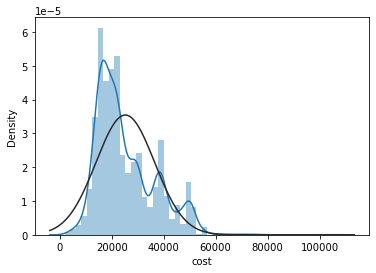

In [11]:
sb.distplot(df.cost,fit=norm);

In [12]:
skew(df.cost)

1.001370553611522

In [13]:
skew(np.log(df['cost']))

-0.08622790968556064

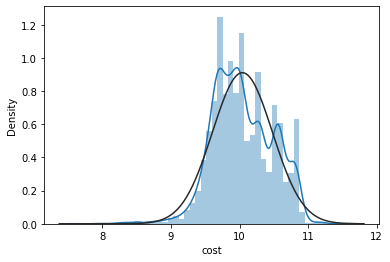

In [14]:
sb.distplot(np.log(df.cost),fit=norm);

In [15]:
df['log_cost'] = np.log(df['cost'])
df.drop('cost',axis=1,inplace=True)

In [16]:
df.head()

,model,year,mileage,image,color,log_cost
0,2019 Audi A5 Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,10.305614
1,2019 Audi A5 Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.431170
2,2019 Audi RS 3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.913269
3,2018 Audi Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,10.081634
4,2018 Audi Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,10.395130


In [17]:
df['model'].unique()[:10]

array(['2019 Audi A5 Sportback', '2019 Audi RS 3', '2018 Audi Q3',
       '2018 Audi Q5', '2018 Audi A8 L', '2018 Audi SQ5',
       '2018 Audi S5 Sportback', '2017 Audi A6', '2017 Audi Q7',
       '2015 Audi Q5'], dtype=object)

In [18]:
model_per_company = {} # Keys are comapnies and values are the models prodced by company

In [19]:
for i in df.model.tolist():
    
    model_name_=''
    for part in i.split(' ')[2:]:
        model_name_+=part+' '
    model_name_=model_name_.rstrip()
    
    if i.split(' ')[1] not in model_per_company.keys():
        model_per_company[i.split(' ')[1]]=[]
    if model_name_ not in model_per_company[i.split(' ')[1]]:
        model_per_company[i.split(' ')[1]].append(model_name_)

In [20]:
with open('./PklFiles/model_transform.pkl','wb') as f:
    pkl.dump(model_per_company,f)

In [21]:
def model_transform(x):
    final=''
    for i in x.split(' ')[2:]:
        final+=i
    return final        

In [22]:
df['company']=df['model'].apply(lambda x:x.split(' ')[1])
df['model']=df['model'].apply(lambda x:model_transform(x))

In [23]:
df.head()

,model,year,mileage,image,color,log_cost,company
0,A5Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,10.305614,Audi
1,A5Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.431170,Audi
2,RS3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.913269,Audi
3,Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,10.081634,Audi
4,Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,10.395130,Audi


In [24]:
df.model.nunique()

203

In [25]:
data.model.nunique()

771

<AxesSubplot:>

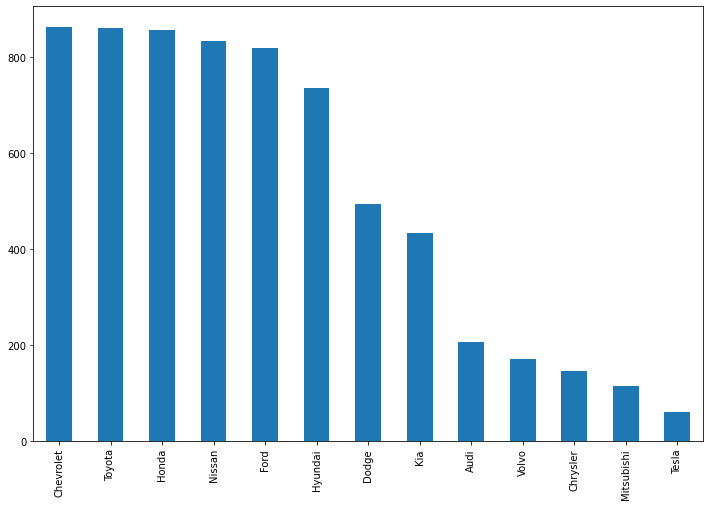

In [26]:
plt.figure(figsize=(12,8))
df.company.value_counts().sort_values(ascending=False).plot(kind='bar')

In [27]:
df['mileage'].fillna('-99,999 miles',inplace=True)

In [28]:
df['mileage']=df['mileage'].apply(lambda x:x.split(' ')[0].replace(',',''))

In [29]:
df.mileage=df.mileage.astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 179
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     6589 non-null   object 
 1   year      6589 non-null   int64  
 2   mileage   6589 non-null   float64
 3   image     6589 non-null   object 
 4   color     6118 non-null   object 
 5   log_cost  6589 non-null   float64
 6   company   6589 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 411.8+ KB


In [31]:
df['mileage'] = df['mileage'].replace(-99999, np.nan)                             

In [32]:
df.groupby('year')['mileage'].mean()

year
1994    150000.000000
1997    123915.000000
1998              NaN
2000     92822.000000
2001    164694.000000
2002     98359.333333
2003    139603.000000
2004    159782.333333
2005    129107.285714
2006    133225.545455
2007    107690.800000
2008    137695.142857
2009    107229.812500
2010    105994.250000
2011    104669.000000
2012     86946.333333
2013     78334.193878
2014     70242.533333
2015     66559.919540
2016     47995.974937
2017     33153.040447
2018     31142.990646
2019     23950.744021
2020     16064.624155
2021       439.000000
Name: mileage, dtype: float64

In [33]:
df[df['year']==1998]

,model,year,mileage,image,color,log_cost,company
46,Durango,1998,NaN,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Gray,11.127086,Dodge


In [34]:
df=df[df['year']!=1998]

In [35]:
df['mileage']=df.groupby('year')['mileage'].transform(lambda x: x.fillna(x.mean()))

In [36]:
df.isnull().sum()

model         0
year          0
mileage       0
image         0
color       471
log_cost      0
company       0
dtype: int64

In [37]:
df.color=df.color.fillna('Not Given')

In [38]:
df.isnull().sum()

model       0
year        0
mileage     0
image       0
color       0
log_cost    0
company     0
dtype: int64

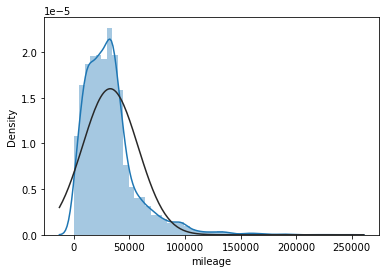

In [39]:
sb.distplot(df['mileage'], fit= norm);

In [40]:
skew(df.mileage)

2.1169389349674566

In [41]:
skew(df['mileage']**(1/3))

-0.18769947901754705

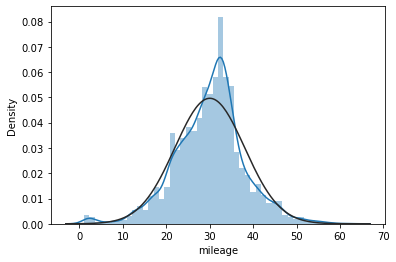

In [42]:
df['mileage'] = df['mileage']**(1/3)
sb.distplot(df['mileage'], fit= norm);

In [43]:
df.color.nunique()

216

In [44]:
df.color.unique()

array(['Ibis White', 'Black', 'Brilliant Black', 'Blue', 'Gray',
       'Not Given', 'Navarra Blue Metallic', 'White',
       'Moonlight Blue Metallic', 'Dark Gray', 'Graphite Gray Metallic',
       'Ink Blue Metallic', 'Monsoon Gray Metallic',
       'Glacier White Metallic', 'Silver', 'Red', 'Mosaic Black Metallic',
       'Nightfall Gray Metallic', 'Iridescent Pearl Tricoat',
       'Shadow Gray Metallic', 'Summit White', 'Black Currant Metallic',
       'Red Hot', 'Pepperdust Metallic', 'Bright Yellow',
       'Blue Velvet Metallic', 'Arctic Blue Metallic',
       'Siren Red Tintcoat', 'Silver Ice Metallic',
       'Slipstream Blue Metallic', 'Blue Ray Metallic',
       'Tungsten Metallic', 'Silver Topaz Metallic',
       'Black Granite Metallic', 'Br', 'Light Pewter Metallic',
       'Ivory White', 'Medium Blue-Green (Met)', 'Beige',
       'Bright White Clearcoat', 'Maximum Steel Metallic Clearcoat',
       'Velvet Red Pearlcoat', 'Granite Crystal Metallic Clearcoat',
       'Jaz

In [45]:
basic_colors = ['white', 'black', 'grey', 'metallic', 'red', 'blue', 'brown', 'green']

In [46]:
def color_transform(x):
    
    not_found = 0
    for i in basic_colors:
        if i in x.lower():
            not_found = 1
            return i
    if not_found == 0:
        return x.lower()

In [47]:
df.color=df.color.apply(lambda x:color_transform(x))

In [48]:
df.color.unique()

array(['white', 'black', 'blue', 'gray', 'not given', 'metallic',
       'dark gray', 'silver', 'red', 'iridescent pearl tricoat',
       'bright yellow', 'br', 'beige', 'grey', 'ivory tri-coat pearl',
       'burgundy', 'billet clearcoat', 'blu by you pearlcoat',
       'in-violet clearcoat', 'granite pearlcoat',
       'yellow jacket clearcoat', 'yellow', 'orange', 'green', 'purple',
       '10045', 'gold', 'brown', 'burgundy night pearl',
       'champagne frost pearl', 'deep ocean pearl', 'body in prime',
       'crimson pearl', 'maroon', 'galactic gray', 'symphony silver',
       'molten silver', 'machine gray', 'symphony air silver',
       'thunder gray', 'mineral beige', 'platinum graphite',
       'coliseum gray', 'mojave sand', 'sedona sunset', 'sparkling ruby',
       'chai bronze', 'sparkling silver', 'phantom gray', 'silky silver',
       'titanium silver', 'titanium gray', 'mineral silver', 'sangria',
       'bright silver', 'burnished copper', 'super silver quadcoat',
  

In [49]:
df.color.nunique()

64

In [50]:
df['color'] = df['color'].replace('grey', 'metallic')

<AxesSubplot:>

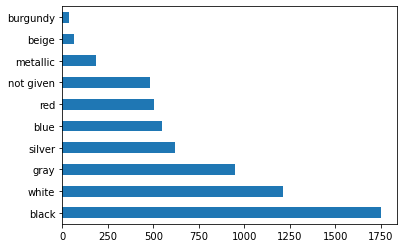

In [51]:
df['color'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh')

In [52]:
color_dict = dict(df['color'].value_counts().sort_values(ascending = False)[:14])

In [53]:
def color_other(x):
    if x not in color_dict.keys():
        return 'Other'
    else:
        return x

In [54]:
df['color']=df['color'].apply(lambda x:color_other(x))

In [55]:
df.color.unique()

array(['white', 'black', 'blue', 'gray', 'not given', 'metallic', 'Other',
       'silver', 'red', 'beige', 'burgundy', 'orange', 'green', 'brown',
       'brilliant silver'], dtype=object)

In [56]:
df['color'] = df['color'].replace('not given', 'n/a')

In [57]:
df.color.unique()

array(['white', 'black', 'blue', 'gray', 'n/a', 'metallic', 'Other',
       'silver', 'red', 'beige', 'burgundy', 'orange', 'green', 'brown',
       'brilliant silver'], dtype=object)

In [58]:
df.drop('image', axis = 1, inplace = True)

In [59]:
import datetime
current_year = datetime.datetime.now().year

In [60]:
df['year']=current_year-df['year']

In [61]:
company_transformer = {}

unique_comps = list(df['company'].unique())

for i in unique_comps:
    com_unique = list(df['company'].unique())
    for y in com_unique:
        if y != i:
            ind = com_unique.index(y)
            com_unique[ind] = 0
    main_ind = com_unique.index(i)
    com_unique[main_ind] = 1
    company_transformer[i] = com_unique

In [62]:
df = pd.concat([df.drop('company', 1), pd.get_dummies(df['company'], drop_first = False)], axis = 1)

In [63]:
with open('PklFiles/companies.pkl', 'wb') as f:
    pkl.dump(company_transformer, f)

In [74]:
df = pd.concat([df.drop('color', 1), pd.get_dummies(df['color'], drop_first = False)], axis = 1)
df_models = list(df['model'].unique())

def transform_models(x):
    return df_models.index(x)

df['model'] = df['model'].apply(lambda x: transform_models(x))

In [81]:
with open('./PklFiles/model_names.pkl', 'wb') as f:
    pkl.dump(df_models, f)

In [83]:
df = df.sample(frac=1).reset_index(drop=True)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('log_cost', 1), df['log_cost'],
                                                    random_state = 42, test_size = 0.2)

In [85]:
!pip install xgboost

^C


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, ElasticNet, BayesianRidge, Ridge, LassoLarsIC
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV as RCV

In [80]:
params = {'n_estimators': np.arange(100,500, 100),
          'max_depth': [2,3,5,7],
          'max_features': [0.5, 1]}

model_rf = RCV(RandomForestRegressor(oob_score = True), params).fit(X_train, y_train)

In [86]:
model_rf = model_rf.best_estimator_

In [87]:
print(np.sqrt(mse(y_test, model_rf.predict(X_test))))
model_rf.score(X_test, y_test)

0.21363851148470844


0.7711326881830507

In [88]:
params = {'n_estimators': np.arange(100,500, 100),
          'learning_rate': np.arange(0.01, 0.31, 0.05),
          'max_features': [0.5, 1],
          'max_depth': [3,5,7],
          'alpha': [0.5, 0.9, 1]}

In [89]:
model_gb = RCV(GradientBoostingRegressor(), params).fit(X_train, y_train)

model_gb = model_gb.best_estimator_

In [90]:
print(np.sqrt(mse(y_test, model_gb.predict(X_test))))
model_gb.score(X_test, y_test)

0.20847801389589432


0.7820558562509289

In [91]:
params = {'n_estimators': np.arange(100,500, 100),
          'learning_rate': np.arange(0.01, 0.31, 0.05),
          'max_depth': [3,5,7],
          'gamma': [0, 0.5, 1]}

model_xg = RCV(XGBRegressor(), params).fit(X_train, y_train)

In [92]:
print(np.sqrt(mse(y_test, model_xg.predict(X_test))))
model_xg.score(X_test, y_test)

0.17127143903732556


0.8529061296659006

In [93]:
model_lr = make_pipeline(RobustScaler(),
                         Lasso(alpha = 0.0001) ).fit(X_train, y_train)
print(np.sqrt(mse(y_test, model_lr.predict(X_test))))
model_lr.score(X_test, y_test)

0.2561522554495985


0.6709809452629223

In [94]:
model_en = ElasticNet(alpha = 0.001, l1_ratio = 0.5).fit(X_train, y_train)
print(np.sqrt(mse(y_test, model_en.predict(X_test))))
model_en.score(X_test, y_test)

0.2567657521204395


0.6694030257791469

In [95]:
models_2 = [('gb', model_gb), 
            ('en', model_en), 
            ('xgb', model_xg)]


model_stack_2 = StackingRegressor(models_2, Lasso(alpha = 0.001)).fit(X_train, y_train)
print(np.sqrt(mse(y_test, model_stack_2.predict(X_test))))
model_stack_2.score(X_test, y_test)

0.17281964338914033


0.8502348067905613

In [96]:
with open('./PklFiles/model_xg.pkl','wb') as f:
    pkl.dump(model_xg,f)

In [98]:
import streamlit as st
import requests
from PIL import Image
from io import BytesIO

In [99]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
